# Binary Classification

- Breast Cancer Dataset

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [2]:
from google.colab import files
uploaded = files.upload()


Saving User_Data.csv to User_Data.csv


## Step 2: Load and Explore the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('User_Data.csv')

In [ ]:
# Explore the dataset

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Step 3: Data Preprocessing

In [7]:
# Check for missing values
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [9]:
# Split the data into features (X) and target (y)
X = df.drop(['Purchased', 'User ID', 'Gender'], axis=1)
y = df['Purchased']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000


In [11]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: EDA and Visualization

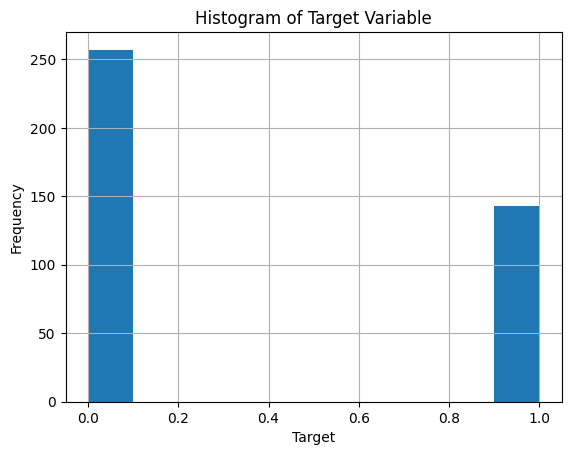

In [12]:
import matplotlib.pyplot as plt

df['Purchased'].hist()
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()

<ipython-input-13-7d22e6585a38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


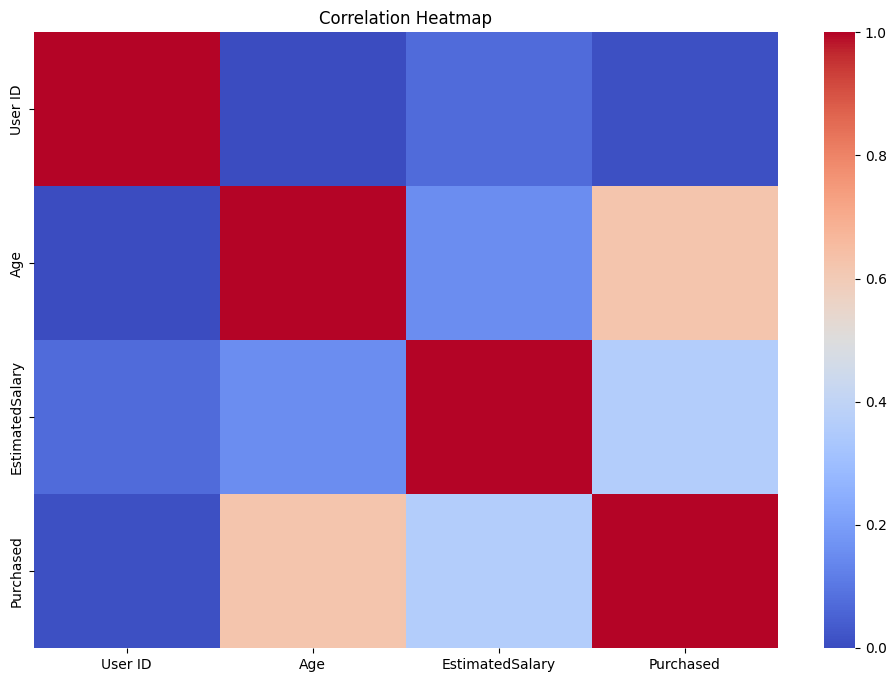

In [13]:
# Visualize a correlation heatmap:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Step 5: Model Training and Evaluation

In [14]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)



In [16]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred,
                         'y_pred_prob': y_pred_prob[:,1]})


,y_test,y_pred,y_pred_prob
209,0,0,0.264651
280,1,1,0.975013
33,0,0,0.022612
210,1,1,0.859014
93,0,0,0.016272
...,...,...,...
246,0,0,0.098101
227,1,1,0.989763
369,1,1,0.657634
176,0,0,0.089679


In [ ]:
model.coef_

In [17]:
compare = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred,
                         'y_pred_prob': y_pred_prob[:,1]})
#len(y_test)
#len(y_pred)
compare.to_csv('compare.csv')

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[41  2]
 [ 1 70]]


In [ ]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

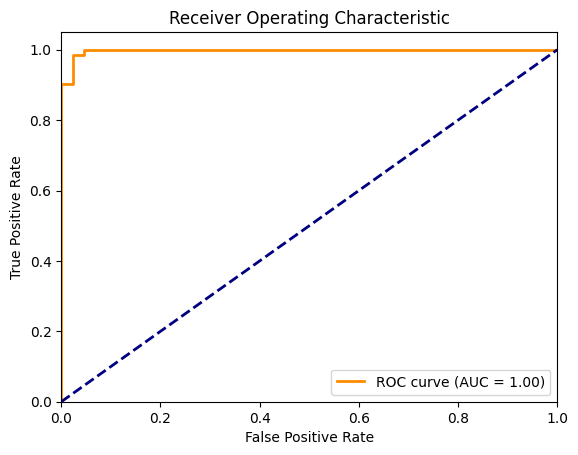

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.coef_

array([[-0.42789615, -0.39391343, -0.38955025, -0.46431618, -0.06675416,
         0.54210625, -0.79677127, -1.1170207 ,  0.23571257,  0.07670117,
        -1.27114722,  0.18863977, -0.60936581, -0.90979979, -0.31246106,
         0.68597229,  0.18081531, -0.31769168,  0.49997976,  0.61340541,
        -0.87861043, -1.3421883 , -0.58755707, -0.84655924, -0.54994459,
         0.00520705, -0.94571375, -0.77343621, -1.20853126, -0.1541604 ]])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [ ]:
df_encoded

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1
